# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.duplicated().sum()

0

### Вывод

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.
Таким образом для каждого из 3214 клиентов мы знаем количество звонков, минут, сообщений и мегабайт-интернет трафика, а также каким тарифом пользуется клиент (если 0 то Смарт, если 1 то Ультра).
По условию данные в предобработке не нуждаются. Пропусков в них нет.

## Разбейте данные на выборки

In [6]:
#Разделим исходные данные на обучающую, валидационную и тестовую выборки.

features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']

Исходные данные разбивают в соотношении 3:1:1.

### Обучающая

In [7]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.4, 
                                                                            random_state=12345
                                                                           ) 

In [8]:
#Размер обучающей выборки

print(features_train.shape)
print(target_train.shape)

(1928, 4)
(1928,)


### Валидационная и тестовая

In [9]:
features_valid, features_test, target_valid, target_test = train_test_split(features_test, 
                                                                            target_test, 
                                                                            test_size=0.5, 
                                                                            random_state=12345
                                                                           ) 

In [10]:
#Размер валидационной выборки

print(features_valid.shape)
print(target_valid.shape)

(643, 4)
(643,)


In [11]:
#Размер тестовой выборки

print(features_test.shape)
print(target_test.shape)

(643, 4)
(643,)


<div class="alert-success"> 
<b>Комментарий ревьюера 👍</b>

Выборки разделены верно, хвалю за то, что проверены размеры выборок с помощью shape

## Исследуйте модели

В столбец "is_ultra" отражено какой тариф использует клиент, Смарт или Ультра, следовательно этот признак является категориальным. Следовательно нам необходимо решить задачу классификации.

В процессе моделирования будем использовать следующие модели машинного обучения:

- ****Решающее дерево****

- ****Случайный лес****

- ****Логистическая регрессия****

### Решающее дерево

In [12]:
#Построим модель "Решающего дерева". Гиперпараметр max_depth будем изменять в пределах от 1 до 10 в цикле.

best_model = None
model_depth_four = None 
best_depth = 0
best_result = 0
depth_dt = []
accuracy_train_dt = []
accuracy_valid_dt = []
for depth in range(1, 11):
    
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_train, target_train)
    result_train = model_dt.score(features_train, target_train) 
    result_valid = model_dt.score(features_valid, target_valid) 
    depth_dt.append(depth)
    accuracy_train_dt.append(result_train) 
    accuracy_valid_dt.append(result_valid) 
    if result_valid > best_result:
        best_model = model_dt 
        best_depth = depth 
        
        best_result = result_valid
    elif depth == 4:
        model_depth_four = model_dt 

print('Глубина дерева наилучшей модели "дерево решений":', best_depth)
print('Accuracy наилучшей модели "дерево решений":', best_result)        

Глубина дерева наилучшей модели "дерево решений": 3
Accuracy наилучшей модели "дерево решений": 0.7853810264385692


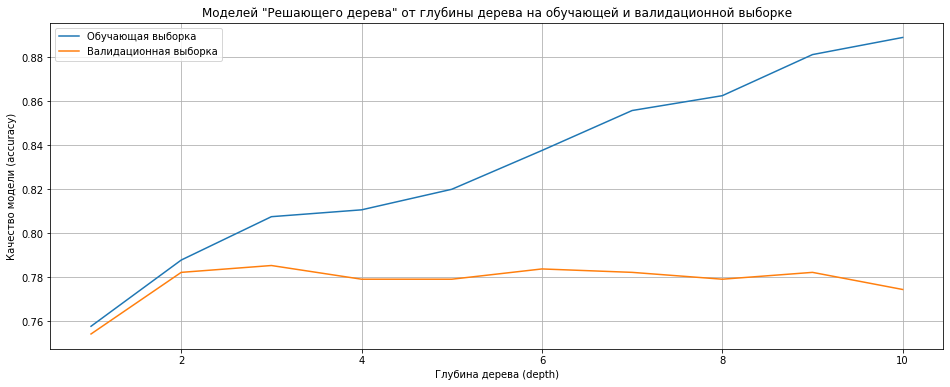

In [13]:
# Построим график на моделей "Решающего дерева" от глубины дерева на обучающей и валидационной выборках:

plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(depth_dt, accuracy_train_dt)
plt.plot(depth_dt, accuracy_valid_dt)
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
plt.xlabel('Глубина дерева (depth)')
plt.ylabel('Качество модели (accuracy)')
plt.title('Моделей "Решающего дерева" от глубины дерева на обучающей и валидационной выборке')
plt.show()

### Случайный лес

In [14]:
# Настроим гиперпараметры модели 'случайный лес' и сделаем цикл для n_estimators и max_depth от 1 до 10:

best_model = None
best_est = 0
best_depth = 0
best_result = 0
for est in range(1, 11):
    for depth in range (1, 11):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_train, target_train) 
        result = model_rf.score(features_valid, target_valid) 
        if result > best_result:
            best_model = model_rf 
            best_est = est 
            best_depth = depth 
            best_result = result 
            
print('Количество деревьев наилучшей модели "случайный лес":', best_est)
print('Глубина дерева наилучшей модели "случайный лес":', best_depth)
print('Accuracy наилучшей модели "случайный лес":', best_result)

Количество деревьев наилучшей модели "случайный лес": 8
Глубина дерева наилучшей модели "случайный лес": 8
Accuracy наилучшей модели "случайный лес": 0.80248833592535


### Логистическая регрессия

In [15]:
model_lr = LogisticRegression(random_state=12345, solver='lbfgs')

model_lr.fit(features_train, target_train)

predictions_lr = model_lr.predict(features_valid)

accuracy_lr = round(accuracy_score(target_valid, predictions_lr), 4)
print("Accuracy модели 'логистическая регрессия':", accuracy_lr)

Accuracy модели 'логистическая регрессия': 0.7107


### Вывод

- Наилучший результат Accuracy у модели решающего дерева - **DecisionTreeClassifier** -  0.7744945567651633

- Результат Accuracy у модели случайного леса - **RandomForestClassifier** - 0.7916018662519441

- Результат Accuracy у модели логистической регрессии - **LogisticRegression** - 0.7589424572317263

Качество модели "логистическая регрессия" на валидационной выборке ниже, чем у моделей "дерево решений" и "случайный лес".

Итак, на валидационной выборке по качеству лидирует модель "случайный лес.

## Проверьте модель на тестовой выборке

In [16]:
# Проверим на тестовой выборке качество модели 'случайный лес' 
predictions_rf_test = model_rf.predict(features_test)
accuracy_rf_test = round(accuracy_score(target_test, predictions_rf_test),4)
print("Доля правильных ответов accuracy в модели 'случайный лес':", accuracy_rf_test)

Доля правильных ответов accuracy в модели 'случайный лес': 0.8009


In [17]:
model_dc = DummyClassifier(strategy='most_frequent', random_state=12345)
model_dc.fit(features_train, target_train)
result_dc = model_dc.score(features_valid, target_valid)
print('Accuracy DummyClassifier:', result_dc)

Accuracy DummyClassifier: 0.7060653188180405


In [18]:
print('Accuracy RandomForestClassifier:',accuracy_rf_test)

Accuracy RandomForestClassifier: 0.8009


### Вывод

Accuracy модели **DummyClassifier** ниже, чем у модели случайного леса **(RandomForestClassifier)** - модель адекватна и эффективна.

## Общий вывод

- Предоставленные данные чистые, без артефактов и прочего;

- Были исследованы модели **Decision Tree Classifier**, **RandomForestClassifier** и **Logistic Regression**;

- Наилучшую эффективность (точность/скорость) показала модель RandomForestClassifier с гиперпараметрами n_estimators равным - 8 и max_depth равным 8;

- Модель **RandomForestClassifier** с наилучшими гиперапараметрами была проверена на тестовой выборке и показала результат Accuracy - 0.7962674961119751;

- Также модель **RandomForestClassifier** проверенная на тестовой выборке была проверена на вменяемость - для проверки использовалась модель **DummyClassifier**, которая показала результат Accuracy - 0.7060653188180405.